# 2 задание
Требуется обучить модель на основе SVM для распознавания рукописных цифр из набора MNIST.В качестве модели применяется LinearSVC. В качестве вектора признаков можно взять линеаризованное изображение, значения элементов от 0 (черный) до 1 (белый). 

# 1 этап
Загрузка данных.
Набор данных MNIST загружаем из пакета keras.

In [17]:
import numpy as np
import keras
import matplotlib.pyplot as plt

In [18]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
# массивы X содержат grayscale изображения цифр, массивы Y - метки
# train - обучающая выборка, test - тестовая выборка
# обучающая выборка нужна для обучения модели  LinearSVC.
# тестовая выборка для тестирования нашей обученной модели
(x_train, y_train), (test_x, test_y) = mnist.load_data()
copy_test_x = test_x

Подготовка данных.

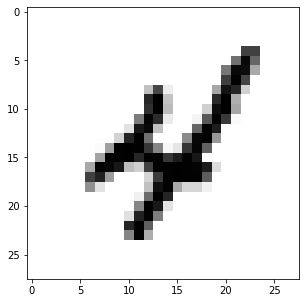

In [19]:
# отобразим элемент для обучения
from matplotlib import pyplot
pyplot.figure(2, figsize=(5, 5))
pyplot.imshow(x_train[9], cmap = plt.cm.binary)
pyplot.show()

In [20]:
# образцы из набора размера 28x28 пикселей
# переведем матрицу 28*28 в вектор из 784 элементов для каждого изображения
num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
test_x = test_x.reshape(test_x.shape[0], num_pixels).astype('float32')
# нормализуем входные данные в [0,1]
# значение пикселя от 0 до 255
x_train = x_train / 255
test_x = test_x / 255

 # 2 этап
 Процесс обучения

Метод опорных векторов SVM (Support Vector Machines) — это линейный алгоритм используемый в задачах классификации и регрессии. 
Основной задачей алгоритма является найти наиболее правильную линию, или гиперплоскость разделяющую данные на два класса

In [21]:
import sklearn.svm as svm
from sklearn.svm import LinearSVC
svm_mimi = svm.LinearSVC(dual = True,max_iter=10)
svm_mimi.fit(x_train,y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(max_iter=10)

# 3 этап


 Ручная проверка качества распознавания на нескольких образцах

Ручная проверка качества распознавания
1 образец
тестовая выборка -  2
предсказание -  2


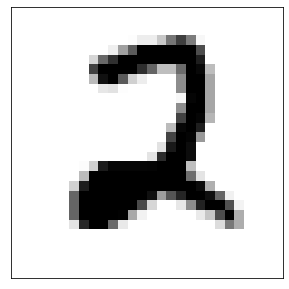

2 образец
тестовая выборка -  5
предсказание -  3


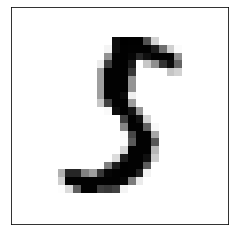

In [23]:
from random import randint
y_predict = svm_mimi.predict(test_X)

pyplot.figure(2, figsize=(5, 5))
i1 = randint(0, 100)
i2 = randint(101, 1000)
print("Ручная проверка качества распознавания")
print("1 образец")
print("тестовая выборка - ", test_y[i1])
print("предсказание - ", y_predict[i1])
pyplot.xticks([])
pyplot.yticks([])
pyplot.imshow(x_testPrint[i1], cmap = plt.cm.binary) # отображение изображения из тестовой выборки
pyplot.show()

print("2 образец")
print("тестовая выборка - ", test_y[i2])
print("предсказание - ", y_predict[i2])
pyplot.xticks([])
pyplot.yticks([])
pyplot.imshow(x_testPrint[i2], cmap = plt.cm.binary) # отображение изображения из тестовой выборки
pyplot.show()


Расчет и построение confusion matrix

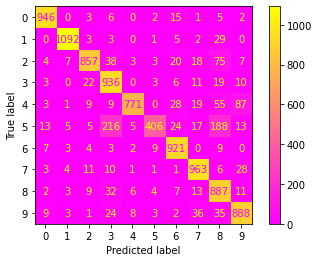

In [24]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm_mimi, test_x, test_y, cmap=plt.cm.spring)

Выполнила Брындина Анна 305 группа